In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week-9

# Perceptron Algorithm


In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0, class_sep = 3, random_state=20)

In this method , we basically need to create a line(decision boundary) such that the data points are divided into two sides, it is in a way a classification model. After which we update the points based on wrong classification, it changes with each input point.

## Problem 1
How many samples are there in the dataset?

In [3]:
X.shape

(50, 2)

In [ ]:
y.shape

(50,)

## Problem 2

How many features are there in the dataset?


In [4]:
X.shape[0]

50

## Problem 3
In the target vector $y$, replace all occurrences of 0 with -1. 

How many unique classes are there in the target vector?

In [5]:
y[y == 0] = -1

In [6]:
np.unique(y)

array([-1,  1])

## Problem 4
Plot the data keeping first feature on the x-axis and the second feature on the y-axis. Plot the data points belonging to each class in different colors. Does the data seem linearly separable?

Yes

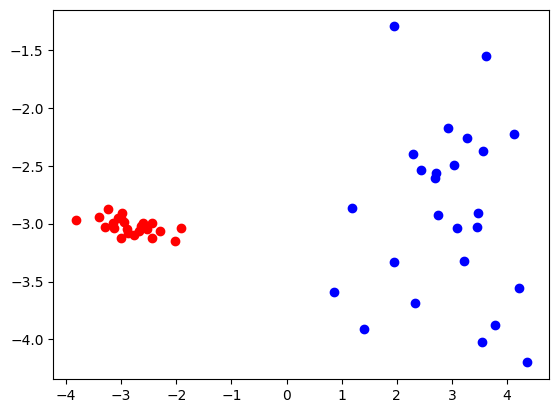

In [10]:
import matplotlib.pyplot as plt
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'ro')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo')

## Problem 5

Initialize w to be a zero vector, with shape equal to the number of features in the data.

Iterate over each data point $x$ in $X$ one by one (in the same sequence as present in $X$). For each data point, compute the value of $w^Tx$. If $w^Tx \ge 0$, predict positive class for $x$, else predict the negative class.

If prediction does not match the actual class label, update the weight vector as per the following update rule:
$w_{new} = w_{old} + xy$ where $x$ is the data point and $y$ is the actual label of $x$.

Run the above for 10 epochs (iterations), but stop if there are no weight updates in an epoch. 

In [11]:
w = np.zeros(X.shape[1])
print('w is ', w)
epochs = 10
total_mistakes = 0
weight_updates_per_epoch = {}

for epoch in range(epochs):
  weight_updates_per_epoch[epoch] = 0
  print('*************epoch', epoch, end = ': ')
  for i in range(len(X)):
    y_pred = 1 if w.T@X[i] >= 0 else -1
    print(y[i], y_pred)
    if y[i] == 1 and y_pred == -1:
      w = w + X[i]
      total_mistakes += 1
      weight_updates_per_epoch[epoch] += 1
    if y[i] == -1 and y_pred == 1:
      w = w - X[i]
      total_mistakes += 1
      weight_updates_per_epoch[epoch] += 1
    print(w)
  # print(epoch)
  print(weight_updates_per_epoch[epoch])
  if weight_updates_per_epoch[epoch] == 0:
    break
print('Total mistakes:', total_mistakes)

print(weight_updates_per_epoch)

print(w)

w is  [0. 0.]
*************epoch 0: 1 1
[0. 0.]
1 1
[0. 0.]
1 1
[0. 0.]
1 1
[0. 0.]
1 1
[0. 0.]
1 1
[0. 0.]
1 1
[0. 0.]
-1 1
[2.53147281 3.04571493]
-1 -1
[2.53147281 3.04571493]
1 -1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
1 1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
1 1
[ 6.08372134 -0.97979197]
1 1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
1 1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
1 1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
1 1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
1 1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
1 1
[ 6.08372134 -0.97979197]
1 1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
1 1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
1 1
[ 6.08372134 -0.97979197]
-1 -1
[ 6.08372134 -0.97979197]
1 1
[ 6.0837

In [12]:
w

array([ 6.08372134, -0.97979197])

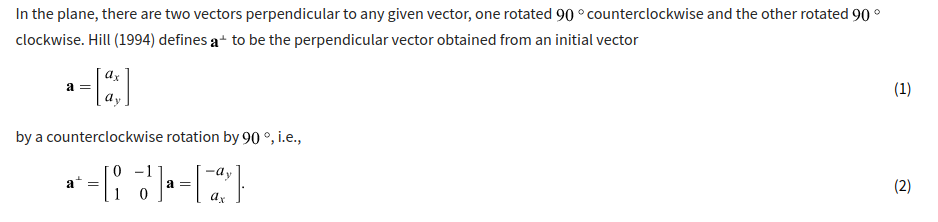

## Problem 6
Plot the vector w and the decision boundary thus obtained.

(-7.0, 7.0)

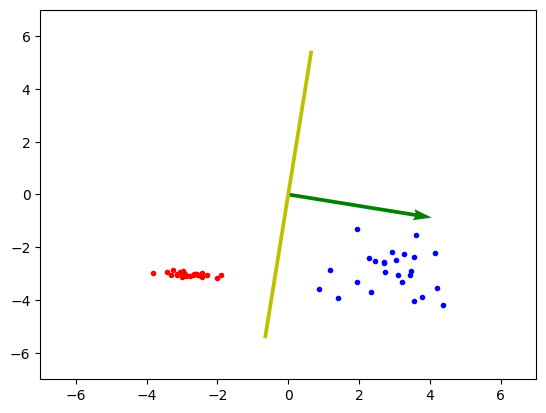

In [13]:
import matplotlib.pyplot as plt
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'ro', ms = 3)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo', ms = 3)
plt.quiver(0, 0, w[0], w[1], scale=21, color = 'g')
plt.quiver(0, 0, -w[1], w[0], scale=21, color = 'y', headaxislength = 0, headlength = 0)
plt.quiver(0, 0, w[1], -w[0], scale=21, color = 'y', headaxislength = 0, headlength = 0)
plt.xlim(-7, 7)
plt.ylim(-7, 7)

## Problem 7
What is the value of loss using the weight vector obtained earlier?  

We increase loss in case of false positive or false negative, that is why we check if y[i]!=y_pref and total loss is number of wrong predicted points

In [14]:
loss = 0
for i in range(len(X)):
    y_pred = 1 if w.T@X[i] >= 0 else -1
    if y[i] == 1 and y_pred == -1:
      loss += 1
    if y[i] == -1 and y_pred == 1:
      loss += 1

loss
      

0

## Problem 8
Now use the following data set, replace occurrences of 0 with -1 and visualize.

In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0.1, class_sep = 2, random_state=20)

In [16]:
y[y == 0] = -1

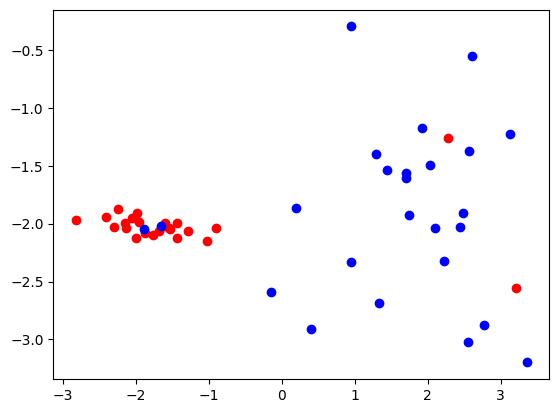

In [17]:
import matplotlib.pyplot as plt
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'ro')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo')

## Problem 9

Apply the Perceptron code again. 

What is the number of weight updates performed in epoch 10?

In [18]:
w = np.zeros(X.shape[1])
epochs = 10
total_mistakes = 0
weight_updates_per_epoch = {}

for epoch in range(epochs):
  weight_updates_per_epoch[epoch] = 0
  print('*************epoch', epoch, end = ': ')
  for i in range(len(X)):
    y_pred = 1 if w.T@X[i] >= 0 else -1
    # print(y[i], y_pred)
    if y[i] == 1 and y_pred == -1:
      w = w + X[i] # adding in case of wrong negative classification
      total_mistakes += 1
      weight_updates_per_epoch[epoch] += 1
    if y[i] == -1 and y_pred == 1:
      w = w - X[i] # adding in case of wrong positive classification
      total_mistakes += 1
      weight_updates_per_epoch[epoch] += 1
    # print(w)
  # print(epoch)
  print(weight_updates_per_epoch[epoch])
  if weight_updates_per_epoch[epoch] == 0:
    break
print('Total mistakes:', total_mistakes)

*************epoch 0: 13
*************epoch 1: 11
*************epoch 2: 12
*************epoch 3: 11
*************epoch 4: 11
*************epoch 5: 10
*************epoch 6: 11
*************epoch 7: 11
*************epoch 8: 11
*************epoch 9: 11
Total mistakes: 112


## Problem 10
Visualize the weight vector and the decision boundary.

(-7.0, 7.0)

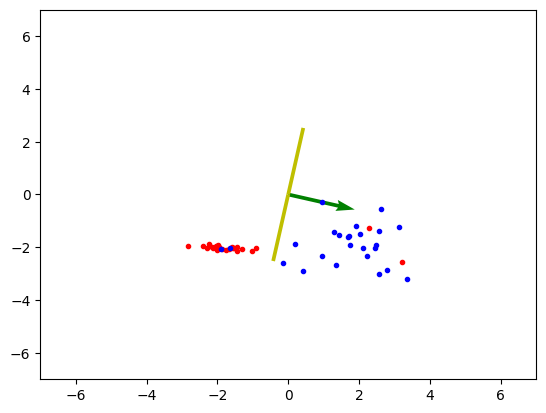

In [22]:
import matplotlib.pyplot as plt
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'ro', ms = 3)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo', ms = 3)

# here onwards this is the way to plot the line for separation
plt.quiver(0, 0, w[0], w[1], scale=21, color = 'g') # this is the perpendicular line 
plt.quiver(0, 0, -w[1], w[0], scale=21, color = 'y', headaxislength = 0, headlength = 0)
plt.quiver(0, 0, w[1], -w[0], scale=21, color = 'y', headaxislength = 0, headlength = 0)
plt.xlim(-7, 7) # these two lines are used to change the position of the line
plt.ylim(-7, 7)

## Problem 11
What is the value of loss using the weight vector obtained in the 10th epoch?

In [24]:
loss = 0
for i in range(len(X)):
    y_pred = 1 if w.T@X[i] >= 0 else -1
    if y[i] == 1 and y_pred == -1:
      loss += 1
    if y[i] == -1 and y_pred == 1:
      loss += 1

loss
      

4